In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from statsmodels.stats import weightstats

from cleaning import df

# Set graph style to Seaborn's default
sns.set()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3860 entries, 0 to 3859
Data columns (total 35 columns):
player             3860 non-null object
href               3860 non-null object
height             3860 non-null float64
age                3860 non-null float64
tm                 3860 non-null object
lg                 3860 non-null object
pos                3860 non-null object
g                  3860 non-null float64
gs                 3860 non-null float64
mp                 3860 non-null float64
fg                 3860 non-null float64
fga                3860 non-null float64
fgp                3860 non-null float64
threep             3860 non-null float64
threepa            3860 non-null float64
threepp            3860 non-null float64
twop               3860 non-null float64
twopa              3860 non-null float64
twopp              3860 non-null float64
efgp               3860 non-null float64
ft                 3860 non-null float64
fta                3860 non-null floa

I want to see if there are big differences between all star seasons and non-all star seasons.

- The null hypothesis is that there is no significant difference between the mean values for all star seasons and non all star seasons.
- The alternate hypothesis is that there is a significant difference between the means of both.

My original $\alpha$ value is 0.05, but since I am testing 29 columns simultaneously, I need to perform a Bonferroni correction on my $\alpha$ by dividing 0.05 by 29. After doing so, my new $\alpha$ = 0.00172.

In [3]:
eda_df = df.drop(['player', 'href', 'tm', 'lg', 'pos'], axis=1)
allstar = eda_df[eda_df.allstar_next == 1]
nostar = eda_df[eda_df.allstar_next == 0]

In [4]:
h_o = zip(allstar.columns, weightstats.ztest(nostar, allstar)[1])

def sig(value, alpha):
    if value < alpha:
        return 'Significant'
    else:
        return 'Not significant'
    
print('Column: p-value')
for i in list(h_o):
    print(i[0], ':', sig(i[1], 0.00172))

Column: p-value
height : Significant
age : Significant
g : Significant
gs : Significant
mp : Significant
fg : Significant
fga : Significant
fgp : Significant
threep : Not significant
threepa : Not significant
threepp : Not significant
twop : Significant
twopa : Significant
twopp : Significant
efgp : Significant
ft : Significant
fta : Significant
ftp : Significant
orb : Significant
drb : Significant
trb : Significant
ast : Significant
stl : Significant
blk : Significant
tov : Significant
pf : Significant
pts : Significant
allstar : Significant
years_in_league : Significant
allstar_next : Significant


C:\Users\Drew\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:655: RuntimeWarning: divide by zero encountered in true_divide
  zstat = (value1 - value2 - diff) / std_diff


In nearly every single category, there is a significant difference between allstars and non allstars. The only one's that are not significantly different are `threep`, `threepa`, and `threepp`. These significant differences make me believe that there is a way to predict whether a player will be an allstar the following year or not.

I want to see the correlations between different values and the `allstar_next` column. I sorted it so I could see which columns are most highly correlated.

In [5]:
df.corr()['allstar_next'].sort_values(ascending=False)

allstar_next       1.000000
pts                0.546165
fta                0.539407
allstar            0.539254
twop               0.536244
ft                 0.535652
fg                 0.533772
twopa              0.532829
fga                0.520361
mp                 0.480490
tov                0.391429
trb                0.358191
gs                 0.307168
pf                 0.294944
drb                0.294126
stl                0.253929
ast                0.237974
blk                0.233708
orb                0.221153
g                  0.202099
fgp                0.127843
efgp               0.098608
height             0.087311
twopp              0.066376
ftp                0.058440
threepa           -0.003463
threep            -0.003992
threepp           -0.013500
age               -0.194724
years_in_league   -0.204990
Name: allstar_next, dtype: float64

In [6]:
for col in df:
    if np.dtype(df[col]) != 'object':
        print(col, '\n',df.corr()[col].sort_values())

height 
 ast               -0.504053
threepp           -0.489235
threepa           -0.449969
threep            -0.429956
stl               -0.345585
ftp               -0.323737
tov               -0.079267
g                  0.013720
fga                0.022979
age                0.023838
mp                 0.057692
ft                 0.081429
allstar_next       0.087311
years_in_league    0.087544
allstar            0.097658
pts                0.099673
gs                 0.115128
twopa              0.119192
fg                 0.138935
fta                0.165462
twop               0.206358
efgp               0.239601
pf                 0.275197
twopp              0.362975
fgp                0.441598
trb                0.594309
orb                0.635807
drb                0.650613
blk                0.670763
height             1.000000
Name: height, dtype: float64
age 
 fta               -0.202905
tov               -0.201989
mp                -0.199340
pf                -0.197280
pts 

twopp 
 threepp           -0.203175
threepa           -0.190825
threep            -0.175190
ftp               -0.115753
age               -0.029864
ast               -0.024156
stl               -0.012755
twopa              0.026908
fga                0.030345
years_in_league    0.044228
pf                 0.060364
allstar_next       0.066376
ft                 0.084123
tov                0.094974
allstar            0.096189
fta                0.126263
mp                 0.145386
g                  0.176511
gs                 0.198879
trb                0.201331
pts                0.209461
twop               0.234107
fg                 0.245444
drb                0.276733
orb                0.286541
blk                0.290199
height             0.362975
efgp               0.707418
fgp                0.921507
twopp              1.000000
Name: twopp, dtype: float64
efgp 
 ast               -0.071558
ftp               -0.042268
threepp           -0.037455
stl               -0.032521
twopa

years_in_league 
 pf                -0.264832
twopa             -0.220754
g                 -0.208508
allstar_next      -0.204990
twop              -0.200580
mp                -0.200003
fta               -0.199464
stl               -0.189692
fga               -0.188951
tov               -0.188108
fg                -0.178247
ft                -0.175419
pts               -0.173182
orb               -0.148964
trb               -0.141558
gs                -0.110470
blk               -0.082744
allstar           -0.062187
ast               -0.054279
drb               -0.053509
threepp           -0.003801
fgp               -0.002183
efgp               0.013588
threepa            0.030875
threep             0.032663
twopp              0.044228
height             0.087544
ftp                0.088427
age                0.939580
years_in_league    1.000000
Name: years_in_league, dtype: float64
allstar_next 
 years_in_league   -0.204990
age               -0.194724
threepp           -0.013500
three

There are strong correlations for a variety of different categories and `allstar_next`. `pts`, `fg`, `fta`, `ft`, `twop`, `allstar`, `twopa`, and `fga` all have correlations above 0.5. The only two categories to have a negative correlation are `years_in_league` and `age` which both follow the same incremental increases but start at different points.

After performing the same correlation tests on the rest of the columns, I came up with the following takeaways about the data:

- `height` is positively correlated with stats typically associated with frontcourt players and negatively correlated with statistics typical of guards.
- `age` is negatively associated with nearly every statistic.
- `g` is not nearly as strongly correlated with other statistics as `gs` is.
- `mp` is highly correlated with nearly every statistic outside of percentages
- All the scoring statistics are correlated with each other (`pts`, `fga`, `fg`, `twopa`, `twop`, `ft`, `fta`)
- `threepp` and `ftp` are positively correlated with each other while `threepp` is negatively correlated with both `twopp` and `fgp`
- `ast` has strong positive correlation with both `tov` and `stl` which are both categories that ballhandlers would accumulate stats in.
- `blk` has a strong positive correlation with `pf` which indicates that players that block shots also tend to foul more.
- After scoring stats, the next most correlated category with whether a player was an allstar the following year is whether they were an allstar the year before and their turnovers.



Next I want to create a scatter matrix of the columns that were highly correlated with `allstar_next` to see how related they are to each other. I am going to ignore `allstar` since it is a binary classifier.

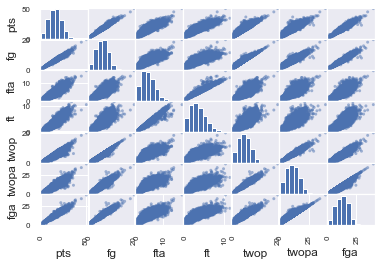

In [7]:
high_cor = df.loc[:, ['pts', 'fg', 'fta', 'ft', 'twop', 'twopa', 'fga']]

_ = pd.plotting.scatter_matrix(high_cor)

There is a lot of multicolinearity occuring in this dataset. This makes sense considering most of these statistics measure scoring. Perhaps I should drop out every classifier directly related to scoring except `pts`.

              fgp     twopp   threepp       ftp      efgp
fgp      1.000000  0.921507 -0.316410 -0.189563  0.701013
twopp    0.921507  1.000000 -0.203175 -0.115753  0.707418
threepp -0.316410 -0.203175  1.000000  0.398895 -0.037455
ftp     -0.189563 -0.115753  0.398895  1.000000 -0.042268
efgp     0.701013  0.707418 -0.037455 -0.042268  1.000000


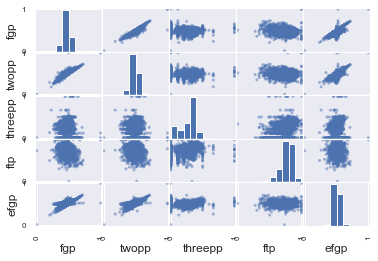

In [8]:
pct = df.loc[:, ['fgp', 'twopp', 'threepp', 'ftp', 'efgp']]
print(pct.corr())
_ = pd.plotting.scatter_matrix(pct)

These relationships make sense logically. Three point shots are more difficult shots, so their relationship with overall field goal percentage would naturally be negative. Additionally, free throw percentage and three point percentage are correlated positively. This checks out as well since most three point shooters are also excellent foul shooters. Scouts will often reference college player's free throw percentage when predicting their potential to become a three point threat in the future.

In [9]:
backcourt = eda_df[(df.pos == 'PG') | (df.pos == 'SG')]
frontcourt = eda_df[(df.pos != 'PG') & (df.pos != 'SG')]

h_o = zip(allstar.columns, weightstats.ztest(backcourt, frontcourt)[1])

def sig(value, alpha):
    if value < alpha:
        return 'Significant'
    else:
        return 'Not significant'
    
print('Column: p-value')
for i in list(h_o):
    print(i[0], ':', sig(i[1], 0.00172))

Column: p-value
height : Significant
age : Not significant
g : Not significant
gs : Significant
mp : Significant
fg : Significant
fga : Not significant
fgp : Significant
threep : Significant
threepa : Significant
threepp : Significant
twop : Significant
twopa : Significant
twopp : Significant
efgp : Significant
ft : Significant
fta : Significant
ftp : Significant
orb : Significant
drb : Significant
trb : Significant
ast : Significant
stl : Significant
blk : Significant
tov : Significant
pf : Significant
pts : Significant
allstar : Significant
years_in_league : Significant
allstar_next : Significant


There are signifcant differences between backcourt players and frontcourt players. This reaffirms my intuition.

After exploring my data, I have put together these takeaways to think about when designing my model:

1)  **The differences between `allstar_next` == 1 and `allstar_next` == 0 are significant.** There is a definite difference in nearly every category, so I feel confident I can produce a model capable of categorizing test data.

2) **There are instances of multicolinearity.** In order to ensure my model does not overfit, I may need to reduce the categories I use. However, since the purpose of this model is to classify players, the underlying coefficients do not matter as much, so I could proceed without worry. Being cognizant of potential multicolinearity can help me if the model produces results that are nonsensical or illogical.

3) **There are positional differences** Things that I may expect to hold true for a center may not hold true for a point guard which is logical, but the confirmation of this intuition opens up a lot of avenues for further exploration.